In [74]:
# Data Pre-processing/Cleaning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Load the dataset
df = pd.read_csv("C:/Users/Maya/OneDrive/Documents/Uni/Y2 S3/Data Science/Project/predictive_maintenance.csv")
np.random.seed(0)

# 1. Drop UDI because it is not used and destroys model efficiency -------------------------------------
df.drop(columns=['UDI'], inplace=True)

# 2. Check for Missing Values ----------------------------------------
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found.")
else:
    print("⚠️ Missing values detected:\n", missing_values)

# 3. Encode Categorical Features -------------------------------------
label_enc = LabelEncoder()

# Encoding Product ID
df['Product ID'] = label_enc.fit_transform(df['Product ID'])

# Encoding Type and Failure Type
df['Type'] = label_enc.fit_transform(df['Type'])
df['Failure Type'] = label_enc.fit_transform(df['Failure Type'])

# 4. Standardizing Numerical Features -------------------------------
scaler = StandardScaler()

# 5. Final Data Check -----------------------------------------------
print("\n🔍 Final Data Check:")
print(df.info())

# Save cleaned data
df.to_csv("dataclean.csv", index=False)
print("\n✅ Cleaned data saved as 'dataclean.csv'.")

df

# Define features and target
X = df.drop(columns=['Target'])  # Features
y = df['Target']                 # Target label (0 = No Failure, 1 = Failure)

# Scale the features for models that are sensitive to feature scales (like SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

✅ No missing values found.

🔍 Final Data Check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  int32  
 1   Type                     10000 non-null  int32  
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
 8   Failure Type             10000 non-null  int32  
dtypes: float64(3), int32(3), int64(3)
memory usage: 586.1 KB
None

✅ Cleaned data saved as 'dataclean.csv'.


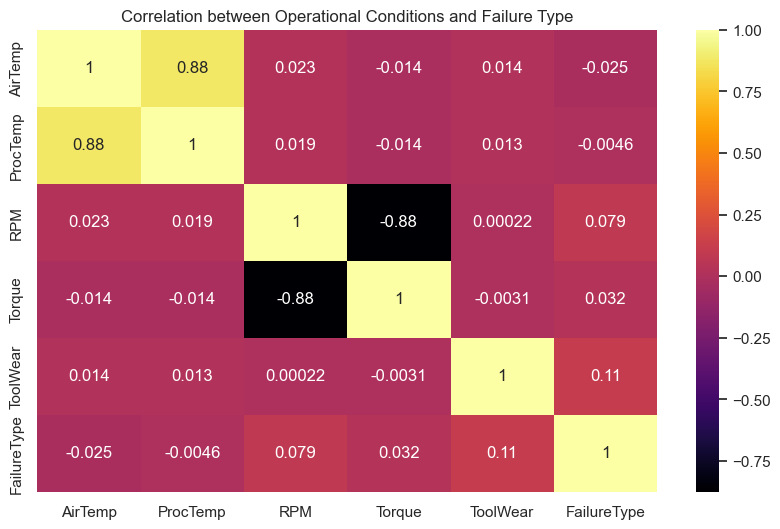

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("dataclean.csv")

# Rename columns for easier access
df.rename(columns={
    "Air temperature [K]": "AirTemp",
    "Process temperature [K]": "ProcTemp",
    "Rotational speed [rpm]": "RPM",
    "Torque [Nm]": "Torque",
    "Tool wear [min]": "ToolWear",
    "Failure Type": "FailureType",
    "Type": "MachineType"
}, inplace=True)

# Plot correlation heatmap between operational variables and failure type
plt.figure(figsize=(10, 6))
corr = df[['AirTemp', 'ProcTemp', 'RPM', 'Torque', 'ToolWear', 'FailureType']].corr()
sns.heatmap(corr, annot=True, cmap='inferno')
plt.title("Correlation between Operational Conditions and Failure Type")
plt.show()


C:\Users\Maya\AppData\Local\Temp\ipykernel_19916\1857250703.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='FailureType', y=feature, palette="pastel")


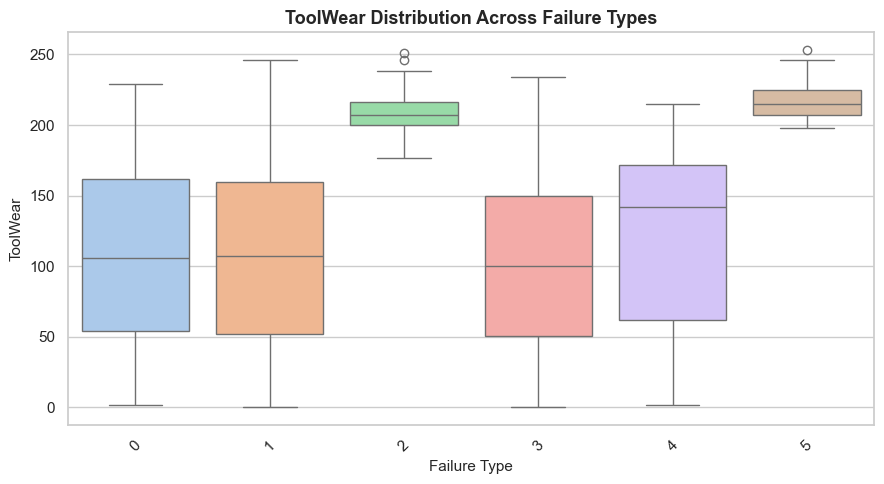

C:\Users\Maya\AppData\Local\Temp\ipykernel_19916\1857250703.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='FailureType', y=feature, palette="pastel")


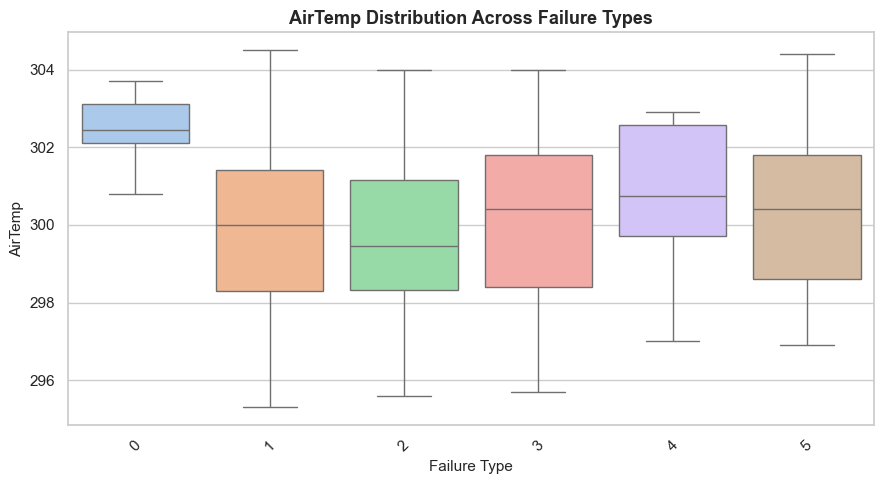

C:\Users\Maya\AppData\Local\Temp\ipykernel_19916\1857250703.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='FailureType', y=feature, palette="pastel")


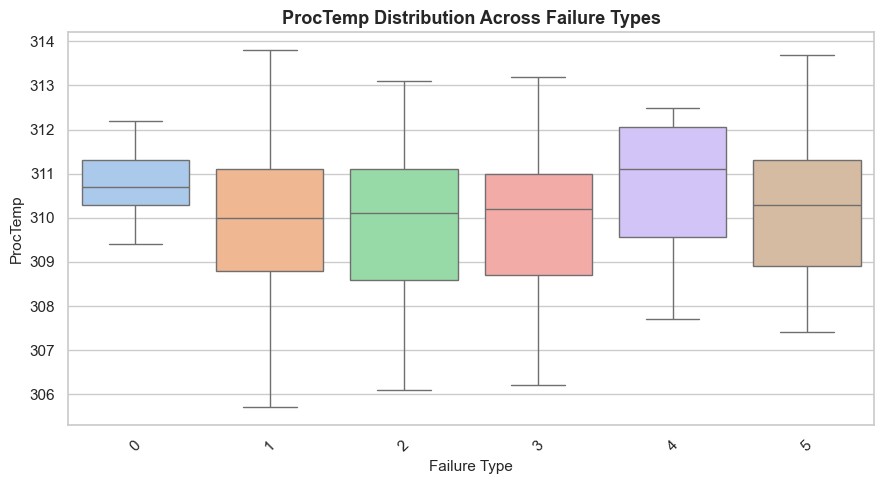

C:\Users\Maya\AppData\Local\Temp\ipykernel_19916\1857250703.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='FailureType', y=feature, palette="pastel")


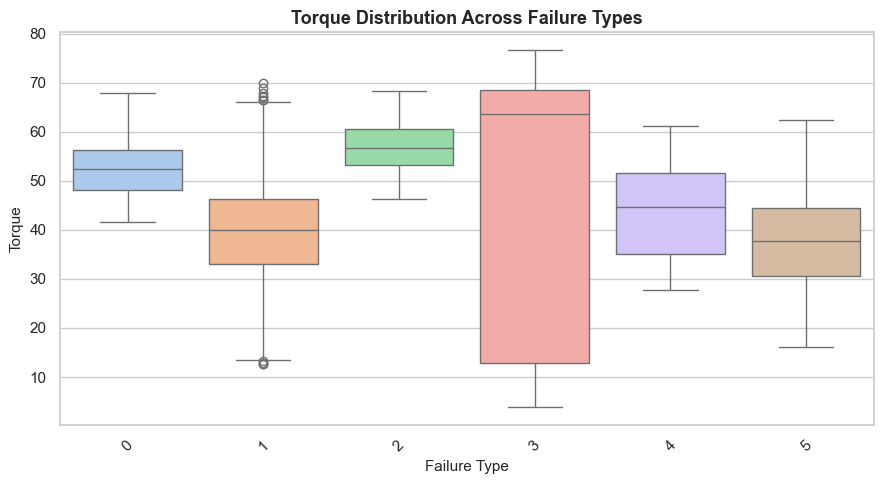

C:\Users\Maya\AppData\Local\Temp\ipykernel_19916\1857250703.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='FailureType', y=feature, palette="pastel")


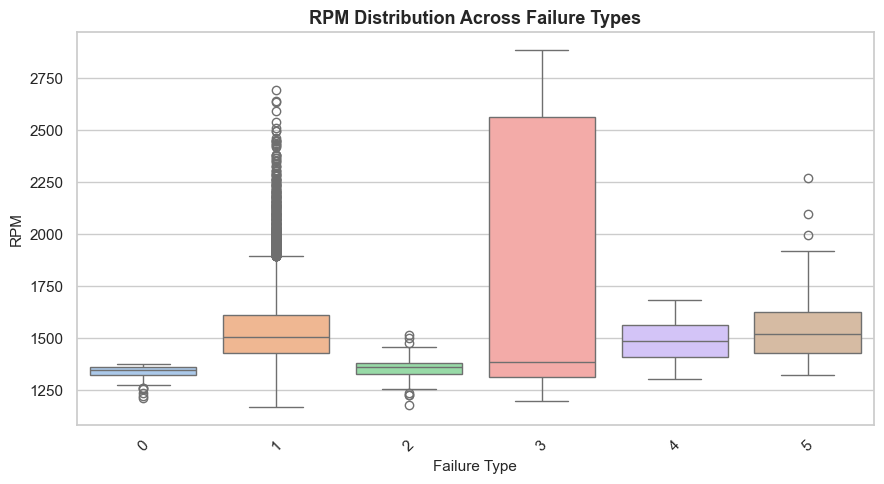

In [78]:
# --- Boxplots: Failure Type vs Operational Variables ---
for feature in ['ToolWear', 'AirTemp', 'ProcTemp', 'Torque', 'RPM']:
    plt.figure(figsize=(9, 5))
    sns.boxplot(data=df, x='FailureType', y=feature, palette="pastel")
    plt.title(f"{feature} Distribution Across Failure Types", fontsize=13, weight='bold')
    plt.xlabel("Failure Type", fontsize=11)
    plt.ylabel(feature, fontsize=11)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

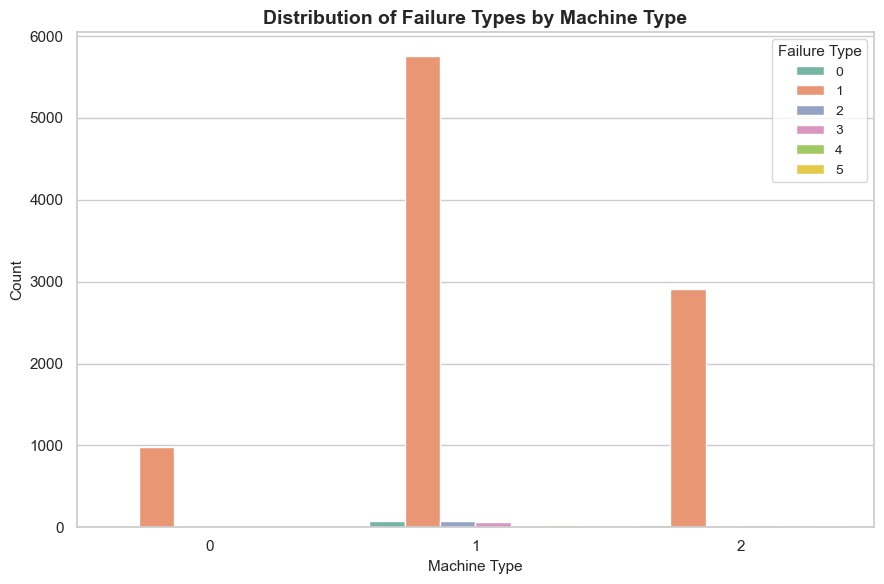

In [72]:
# --- Countplot: Machine Type vs Failure Type ---
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='MachineType', hue='FailureType', palette="Set2")
plt.title("Distribution of Failure Types by Machine Type", fontsize=14, weight='bold')
plt.xlabel("Machine Type", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.legend(title="Failure Type", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

In [57]:
# Question 3 (Damia)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Initialize and train the models

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Support Vector Machine
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate models using accuracy, precision, recall, and F1-score

# Create a function to extract model performance
def extract_performance(y_test, y_pred, model_name):
    report = classification_report(y_test, y_pred, output_dict=True)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"]
    }

# Compile performance metrics
results = {
    "Random Forest": extract_performance(y_test, y_pred_rf, "Random Forest"),
    "SVM": extract_performance(y_test, y_pred_svm, "SVM"),
    "XGBoost": extract_performance(y_test, y_pred_xgb, "XGBoost")
}

# Display results
pd.DataFrame(results).T

,Accuracy,Precision,Recall,F1-Score
Random Forest,0.9980,0.967213,0.967213,0.967213
SVM,0.9990,1.000000,0.967213,0.983333
XGBoost,0.9985,0.983333,0.967213,0.975207


C:\Users\Maya\AppData\Local\Temp\ipykernel_19916\3202471334.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  threshold_analysis = df.groupby('Tool wear bin')['Target'].mean().reset_index()
C:\Users\Maya\AppData\Local\Temp\ipykernel_19916\3202471334.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tool Wear Range', y='Failure Rate', data=threshold_analysis, palette="rocket")


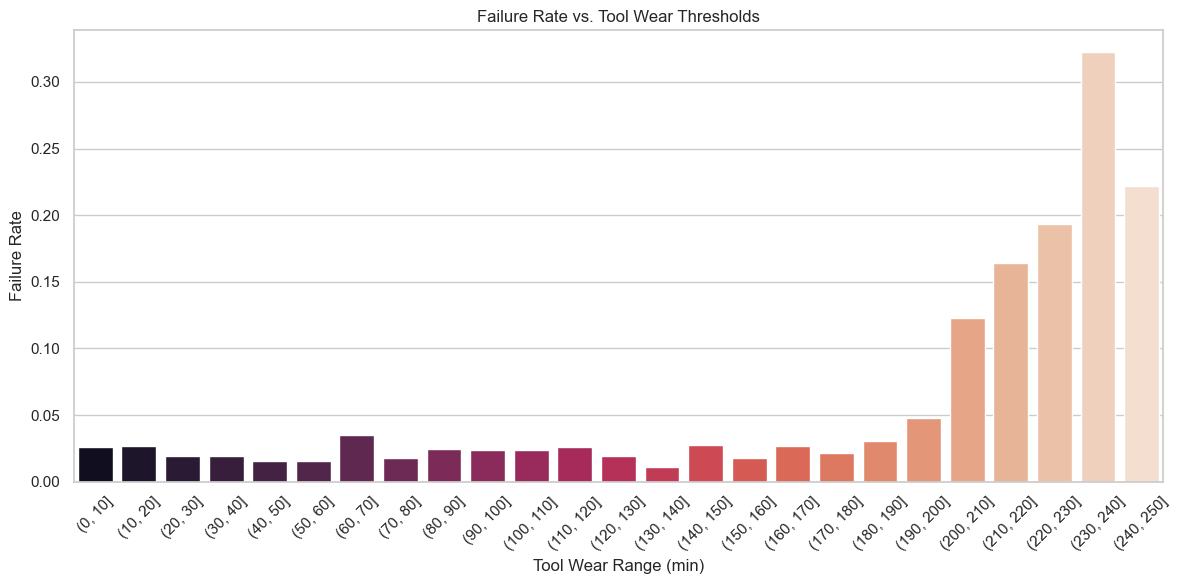

   Tool Wear Range  Failure Rate
0          (0, 10]      0.025882
1         (10, 20]      0.027140
2         (20, 30]      0.019651
3         (30, 40]      0.019608
4         (40, 50]      0.015385
5         (50, 60]      0.015385
6         (60, 70]      0.035011
7         (70, 80]      0.017505
8         (80, 90]      0.024609
9        (90, 100]      0.024176
10      (100, 110]      0.024176
11      (110, 120]      0.025751
12      (120, 130]      0.019608
13      (130, 140]      0.011161
14      (140, 150]      0.027837
15      (150, 160]      0.017778
16      (160, 170]      0.027149
17      (170, 180]      0.021368
18      (180, 190]      0.030769
19      (190, 200]      0.047722
20      (200, 210]      0.122850
21      (210, 220]      0.164444
22      (220, 230]      0.193182
23      (230, 240]      0.322581
24      (240, 250]      0.222222


In [82]:
# Question 4 (Lycia)

# Load the cleaned dataset
df = pd.read_csv("dataclean.csv")  # Make sure this path is correct in your notebook

# Step 1: Create bins for tool wear
df['Tool wear bin'] = pd.cut(df['Tool wear [min]'], bins=np.arange(0, 260, 10))

# Step 2: Calculate failure rate per bin
threshold_analysis = df.groupby('Tool wear bin')['Target'].mean().reset_index()
threshold_analysis.columns = ['Tool Wear Range', 'Failure Rate']

# Step 3: Plot failure rate vs. tool wear range
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='Tool Wear Range', y='Failure Rate', data=threshold_analysis, palette="rocket")

# Step 4: Final plot adjustments
plt.xticks(rotation=45)
plt.title("Failure Rate vs. Tool Wear Thresholds")
plt.xlabel("Tool Wear Range (min)")
plt.ylabel("Failure Rate")
plt.tight_layout()
plt.show()

# Optional: Display the table of results
print(threshold_analysis)

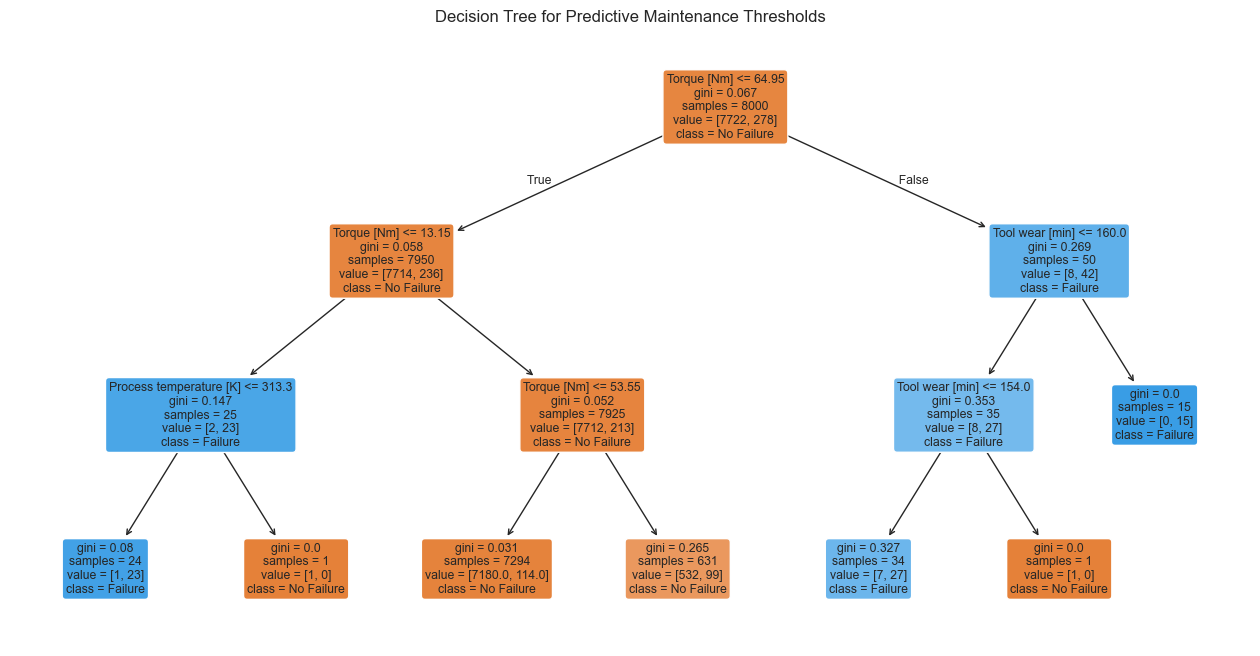

              precision    recall  f1-score   support

  No Failure       0.98      1.00      0.99      1939
     Failure       0.79      0.25      0.38        61

    accuracy                           0.97      2000
   macro avg       0.88      0.62      0.68      2000
weighted avg       0.97      0.97      0.97      2000



In [84]:
# Select key sensor features and target
features = ['Tool wear [min]', 'Torque [Nm]', 'Air temperature [K]', 'Process temperature [K]']
X = df[features]
y = df['Target']

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Step 3: Plot the decision tree
plt.figure(figsize=(16, 8))
plot_tree(tree_model, feature_names=features, class_names=["No Failure", "Failure"],
          filled=True, rounded=True)
plt.title("Decision Tree for Predictive Maintenance Thresholds")
plt.show()

# Step 4: Classification performance
y_pred = tree_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=["No Failure", "Failure"])
print(report)